# Making our nxn matrix whose diagonals are -1 and first value afterwards is 1

In [1]:
def P(n):
    import numpy as np

    # Generate the 0 matrix as our starting point
    matrix = np.zeros((n,n))

    
    

    # Loop to cycle through every single value in the matrix
    for row in range(n):
        for column in range(n):
        
        # If the row and column have the same values, then we are at a diagonal
            if row-column == 0:
                matrix[row][column] = -1
        
        # If column value is 1 higher than row value, then we are at a value following the diagonal.
            elif column-row == 1:
                matrix[row][column] = 1

                
                
                
    return matrix

# Approximating the derivative numerically using Linear Algebra
# f(x) = -x^3+5x^2+x

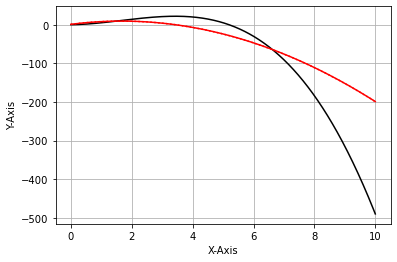

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define our initial function and our known exact derivative of it
def f(x):
    return -x**3+5*x**2+x

def ff(x):
    return -3*x**2+5*2*x+1




# Define our input x-values and other variables
# Define our max and min input value
a = 0
b = 10

# n will divide our range into distinct x-values
n = 1000
x_val = np.linspace(a, b, n+1)

# h will be relevant when estimating the derivative
h = (b-a) / n




# Defining and plotting our y-values and exact derivative values
y_val = f(x_val)
plt.plot(x_val, y_val, color="black")

d_val = ff(x_val)
plt.plot(x_val, d_val, color="red")




# We hit an issue where if we use our P matrix as-is for Py=y', we'll end up with a y-prime value that's an outlier.
# Our issue is our last row in P being [... 0 -1], so we resolve this by removing that row
P_mat = P(n+1)
P_mat = P_mat[:-1]

#Since our approximation will have now have one less y-value, we must also have one less x-value to plot properly
xp_val = x_val[:-1]




# Multiply our P-matrix and our y-values vector with 1/h to approximation y-prime, then plot it
yp_val = np.matmul(P_mat , y_val) / h
plt.plot(xp_val, yp_val, color="red", linestyle="dotted")




# Set up our cosmetic expectations for our plot and display the graph
plt.grid()
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.show()